# [Chapter 9 퀀트 전략을 이용한 종목선정 (기본)](https://hyunyulhenry.github.io/quant_cookbook/%ED%80%80%ED%8A%B8-%EC%A0%84%EB%9E%B5%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%A2%85%EB%AA%A9%EC%84%A0%EC%A0%95-%EA%B8%B0%EB%B3%B8.html)

In [ ]:
!pip install -U finance-datareader

In [ ]:
import pandas as pd
import FinanceDataReader as fdr

In [ ]:
# 데이터 불러오기
df = fdr.StockListing("ETF/KR") 
rm = fdr.DataReader('102110','2021-05-01')
ri = fdr.DataReader('039490','2021-05-01')
rm,ri

(             Open   High    Low  Close   Volume    Change
 Date                                                     
 2021-05-03  41440  41817  41184  41231   756447 -0.005427
 2021-05-04  41298  41571  41125  41554   420335  0.007834
 2021-05-06  41410  41845  41351  41809   386475  0.006137
 2021-05-07  41835  42232  41827  42092   430328  0.006769
 2021-05-10  42385  42894  42232  42773   735207  0.016179
 ...           ...    ...    ...    ...      ...       ...
 2022-04-28  34935  35060  34630  35060  1591350  0.009502
 2022-04-29  35125  35600  34935  35575   615911  0.014689
 2022-05-02  35100  35485  35100  35415  1105582 -0.004498
 2022-05-03  35415  35705  35340  35370   637211 -0.001271
 2022-05-04  35505  35625  35290  35420   379599  0.001414
 
 [249 rows x 6 columns],
               Open    High     Low   Close  Volume    Change
 Date                                                        
 2021-05-03  132500  133000  125500  127000  125164 -0.041509
 2021-05-04  126500 

In [ ]:
# 수익률 계산
rm = rm / rm.iloc[0,0] - 1
ri = ri / ri.iloc[0,0] - 1

In [ ]:
# 자산가격결정모형 (회귀분석)
from statsmodels.formula.api import ols

In [ ]:
reg_data = pd.concat( [ri['Close'], rm['Close']] ,axis=1)
reg_data.columns = ['ri','rm']
reg = ols('ri ~ rm',data=reg_data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                     ri   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1818.
Date:                Thu, 05 May 2022   Prob (F-statistic):          6.71e-116
Time:                        20:40:20   Log-Likelihood:                 525.42
No. Observations:                 249   AIC:                            -1047.
Df Residuals:                     247   BIC:                            -1040.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0965      0.003    -38.001      0.0

Ri = -0.0965 + 1.3354*Rm

β=1.3354, Rf = -0.0965/(1-β) = 0.2878



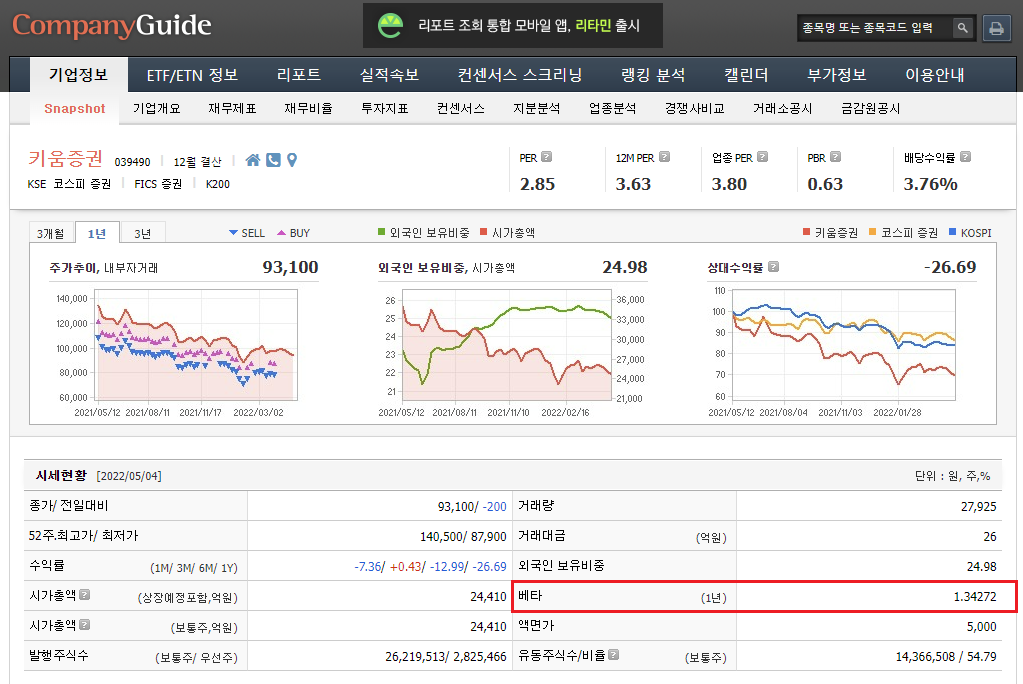

http://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?pGB=1&gicode=A039490&cID=&MenuYn=Y&ReportGB=&NewMenuID=101&stkGb=701

In [ ]:
# 추세선 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

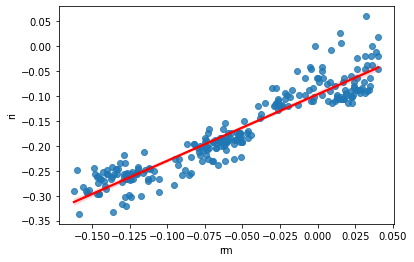

In [ ]:
sns.regplot(data=reg_data,x='rm',y='ri',line_kws={'color': 'red'}) 